In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql.types import *

In [8]:
sc.setLogLevel("WARN")

In [9]:

log_txt = sc.textFile("/home/h110-04/Weather/weather01.txt")
sqlContext = SQLContext(sc)

In [34]:
header = log_txt.first()
fields = [StructField(field_name, StringType(), True)
      for field_name in header.split(',')]

In [35]:
header

'      X year month                   measure                X1        X2'

In [45]:
log_txt = log_txt.filter(lambda line: line != header) # Remove header from the txt file
temp_var = log_txt.map(lambda k: k.split('/t'))

In [46]:
log_df=temp_var.toDF(header.split('/t'))
log_df.show()

+------------------------------------------------------------------------+
|      X year month                   measure                X1        X2|
+------------------------------------------------------------------------+
|                                                    1     1 2014    1...|
|                                                    2     2 2014    1...|
|                                                    3     3 2014    1...|
|                                                    4     4 2014    1...|
|                                                    5     5 2014    1...|
|                                                    6     6 2014    1...|
|                                                    7     7 2014    1...|
|                                                    8     8 2014    1...|
|                                                    9     9 2014    1...|
|                                                    10   10 2014    1...|
|                        

In [51]:
log_df.select(["f      X","measure                "]).show()

AnalysisException: "cannot resolve '`f      X`' given input columns: [      X year month                   measure                X1        X2];;\n'Project ['f      X, 'measure                ]\n+- LogicalRDD [      X year month                   measure                X1        X2#72], false\n"

In [15]:
weather01 = sc.textFile("/home/h110-04/Weather/weather01.txt")
weather02 = sc.textFile("/home/h110-04/Weather/weather02.txt")
weather03 = sc.textFile("/home/h110-04/Weather/weather03.txt")
weather04 = sc.textFile("/home/h110-04/Weather/weather04.txt")
weather05 = sc.textFile("/home/h110-04/Weather/weather05.txt")
weather06 = sc.textFile("/home/h110-04/Weather/weather06.txt")


In [16]:
weather01.collect()

['      X year month                   measure                X1        X2',
 '1     1 2014    12          Max.TemperatureF                64        42',
 '2     2 2014    12         Mean.TemperatureF                52        38',
 '3     3 2014    12          Min.TemperatureF                39        33',
 '4     4 2014    12            Max.Dew.PointF                46        40',
 '5     5 2014    12            MeanDew.PointF                40        27',
 '6     6 2014    12             Min.DewpointF                26        17',
 '7     7 2014    12              Max.Humidity                74        92',
 '8     8 2014    12             Mean.Humidity                63        72',
 '9     9 2014    12              Min.Humidity                52        51',
 '10   10 2014    12  Max.Sea.Level.PressureIn             30.45     30.71',
 '11   11 2014    12 Mean.Sea.Level.PressureIn             30.13     30.59',
 '12   12 2014    12  Min.Sea.Level.PressureIn             30.01      30.4',

In [4]:
header01 = weather01.first()

In [5]:
header01

'      X year month                   measure                X1        X2'

In [6]:
words = sc.parallelize(weather01) 

TypeError: 'RDD' object is not iterable

In [20]:
weather0z

TypeError: Can not infer schema for type: <class 'str'>

In [9]:
weather = pd.melt(weather,
                 id_vars=['year', 'month', 'measure'],
                 var_name='day');
weather.dropna(inplace=True)
weather = weather.reset_index(drop=True)

In [10]:
weather.head(10)

,year,month,measure,day,value
0,2014,12,Max.TemperatureF,X1,64
1,2014,12,Mean.TemperatureF,X1,52
2,2014,12,Min.TemperatureF,X1,39
3,2014,12,Max.Dew.PointF,X1,46
4,2014,12,MeanDew.PointF,X1,40
5,2014,12,Min.DewpointF,X1,26
6,2014,12,Max.Humidity,X1,74
7,2014,12,Mean.Humidity,X1,63
8,2014,12,Min.Humidity,X1,52
9,2014,12,Max.Sea.Level.PressureIn,X1,30.45


In [14]:
weather = weather.rename(columns={'year': 'Year', 'month': 'Month','measure': 'Weather','day':'Day','value':'Value'})

In [15]:
def creating_date(row):
    return "%d-%02d-%02d" % (row['Year'], row['Month'], int(row['Day'][1:]))

weather['Date'] = weather.apply(creating_date,axis=1)
weather = weather [['Weather', 'Value', 'Date']]
weather.head(5)

,Weather,Value,Date
0,Max.TemperatureF,64,2014-12-01
1,Mean.TemperatureF,52,2014-12-01
2,Min.TemperatureF,39,2014-12-01
3,Max.Dew.PointF,46,2014-12-01
4,MeanDew.PointF,40,2014-12-01


In [16]:
weather = weather.replace('<NA>',py.NaN)

In [17]:
weather = weather.dropna()

In [18]:
#weather['Date'] = pd.to_datetime(weather['Date'])

In [19]:
weather.tail()

,Weather,Value,Date
8616,Mean.Wind.SpeedMPH,7,2015-10-31
8617,Max.Gust.SpeedMPH,17,2015-10-31
8618,PrecipitationIn,0.00,2015-10-31
8619,CloudCover,4,2015-10-31
8620,WindDirDegrees,224,2015-10-31


In [20]:
weather = weather.pivot(index='Date', columns= 'Weather', values='Value')
weather.head(5)

Weather,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2014-12-01,6,Rain,46,29,74,30.45,64,10,22,63,...,10,13,40,26,52,30.01,39,10,0.01,268
2014-12-02,7,Rain-Snow,40,29,92,30.71,42,10,24,72,...,8,15,27,17,51,30.4,33,2,0.10,62
2014-12-03,8,Rain,49,38,100,30.4,51,10,29,79,...,5,12,42,24,57,29.87,37,1,0.44,254
2014-12-04,3,NaN,24,33,69,30.56,43,10,25,54,...,10,12,21,13,39,30.09,30,10,0.00,292
2014-12-05,5,Rain,37,26,85,30.68,42,10,22,66,...,10,10,25,12,47,30.45,26,5,0.11,61
2014-12-06,8,Rain,45,25,100,30.42,45,10,22,93,...,4,8,40,36,85,30.16,38,0,1.09,313
2014-12-07,6,Rain,36,32,92,30.69,38,10,25,61,...,10,15,20,-3,29,30.24,21,5,0.13,350
2014-12-08,8,Snow,28,28,92,30.77,29,10,21,70,...,8,13,16,3,47,30.51,18,2,0.03,354
2014-12-09,8,Rain,49,52,100,30.51,49,10,38,93,...,2,20,41,28,86,29.49,29,1,2.90,38


In [21]:
weather = weather.reset_index()
weather.tail(5)

Weather,Date,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
0,2014-12-01,6,Rain,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
1,2014-12-02,7,Rain-Snow,40,29,92,30.71,42,10,24,...,8,15,27,17,51,30.4,33,2,0.10,62
2,2014-12-03,8,Rain,49,38,100,30.4,51,10,29,...,5,12,42,24,57,29.87,37,1,0.44,254
3,2014-12-04,3,NaN,24,33,69,30.56,43,10,25,...,10,12,21,13,39,30.09,30,10,0.00,292
4,2014-12-05,5,Rain,37,26,85,30.68,42,10,22,...,10,10,25,12,47,30.45,26,5,0.11,61
5,2014-12-06,8,Rain,45,25,100,30.42,45,10,22,...,4,8,40,36,85,30.16,38,0,1.09,313
6,2014-12-07,6,Rain,36,32,92,30.69,38,10,25,...,10,15,20,-3,29,30.24,21,5,0.13,350
7,2014-12-08,8,Snow,28,28,92,30.77,29,10,21,...,8,13,16,3,47,30.51,18,2,0.03,354
8,2014-12-09,8,Rain,49,52,100,30.51,49,10,38,...,2,20,41,28,86,29.49,29,1,2.90,38
9,2014-12-10,8,Rain,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357


In [22]:
weather = weather.drop(365,axis=0)

In [23]:
weather['Events'] =weather['Events'].fillna(method='ffill')
weather.head(5)

Weather,Date,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
0,2014-12-01,6,Rain,46,29,74,30.45,64,10,22,...,10,13,40,26,52,30.01,39,10,0.01,268
1,2014-12-02,7,Rain-Snow,40,29,92,30.71,42,10,24,...,8,15,27,17,51,30.4,33,2,0.10,62
2,2014-12-03,8,Rain,49,38,100,30.4,51,10,29,...,5,12,42,24,57,29.87,37,1,0.44,254
3,2014-12-04,3,Rain,24,33,69,30.56,43,10,25,...,10,12,21,13,39,30.09,30,10,0.00,292
4,2014-12-05,5,Rain,37,26,85,30.68,42,10,22,...,10,10,25,12,47,30.45,26,5,0.11,61
5,2014-12-06,8,Rain,45,25,100,30.42,45,10,22,...,4,8,40,36,85,30.16,38,0,1.09,313
6,2014-12-07,6,Rain,36,32,92,30.69,38,10,25,...,10,15,20,-3,29,30.24,21,5,0.13,350
7,2014-12-08,8,Snow,28,28,92,30.77,29,10,21,...,8,13,16,3,47,30.51,18,2,0.03,354
8,2014-12-09,8,Rain,49,52,100,30.51,49,10,38,...,2,20,41,28,86,29.49,29,1,2.90,38
9,2014-12-10,8,Rain,45,29,100,29.58,48,10,23,...,3,13,39,37,89,29.43,38,1,0.28,357


In [24]:
weather = weather.sort_values('Date',ascending= False)

In [25]:
weather = weather.set_index('Date',drop=True)

In [26]:
weather.index = pd.to_datetime(weather.index)

In [27]:
plot = weather.Events
events_plot = cl.Counter(plot)
weather_plot = pd.DataFrame.from_dict(events_plot, orient='index')
weather_plot = weather_plot[0].sort_values(ascending=False).head(5)

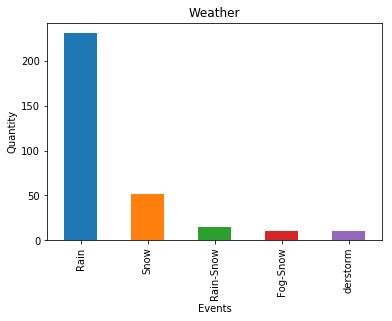

In [25]:
weather_plot.plot(kind='bar')
plt.xlabel('Events')
plt.ylabel('Quantity')
plt.title('Weather')
plt.show()

In [28]:
weather.head(5)

Weather,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-30,6,Rain,26,17,75,30.53,38,10,14,65,...,10,9,23,18,54,30.39,28,10,0.00,65
2015-11-29,4,Rain,33,20,79,30.42,44,10,16,58,...,10,10,23,15,36,30.19,32,10,0.00,326
2015-11-28,8,Rain,50,23,93,30.2,60,10,18,80,...,9,10,43,36,67,30.11,41,4,0.21,358
2015-11-27,7,Rain,52,32,100,30.63,64,10,26,78,...,9,14,49,47,56,30.15,48,5,0.00,209
2015-11-26,6,Rain,49,28,100,30.87,59,10,22,79,...,9,10,42,34,57,30.64,38,5,0.00,180
2015-11-25,1,Rain,34,18,76,30.88,44,10,14,63,...,10,6,27,20,49,30.54,30,10,0.00,83
2015-11-24,1,Rain,21,22,50,30.53,44,10,15,42,...,10,8,16,11,33,30.16,29,10,0.00,271
2015-11-23,3,Rain,36,31,85,30.15,42,10,22,56,...,10,13,18,5,27,29.8,30,10,0.04,316
2015-11-22,8,Rain,44,25,89,30,49,10,20,80,...,9,7,39,31,70,29.82,36,5,0.30,341


In [29]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-11-30 to 2014-12-01
Data columns (total 22 columns):
CloudCover                   365 non-null object
Events                       365 non-null object
Max.Dew.PointF               365 non-null object
Max.Gust.SpeedMPH            359 non-null object
Max.Humidity                 365 non-null object
Max.Sea.Level.PressureIn     365 non-null object
Max.TemperatureF             365 non-null object
Max.VisibilityMiles          365 non-null object
Max.Wind.SpeedMPH            365 non-null object
Mean.Humidity                365 non-null object
Mean.Sea.Level.PressureIn    365 non-null object
Mean.TemperatureF            365 non-null object
Mean.VisibilityMiles         365 non-null object
Mean.Wind.SpeedMPH           365 non-null object
MeanDew.PointF               365 non-null object
Min.DewpointF                365 non-null object
Min.Humidity                 365 non-null object
Min.Sea.Level.PressureIn     365 non-null o

In [30]:
weather['Max.TemperatureF'] = weather['Max.TemperatureF'].astype(int)

In [31]:
weather['Min.TemperatureF'] = weather['Min.TemperatureF'].astype(int)

In [32]:
weather['Mean.TemperatureF'] = weather['Mean.TemperatureF'].astype(int)

In [33]:
weather['Max.Dew.PointF'] = weather['Max.Dew.PointF'].astype(int)

In [34]:
weather['MeanDew.PointF'] = weather['MeanDew.PointF'].astype(int)

In [35]:
weather['Min.DewpointF'] = weather['Min.DewpointF'].astype(int)

In [36]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2015-11-30 to 2014-12-01
Data columns (total 22 columns):
CloudCover                   365 non-null object
Events                       365 non-null object
Max.Dew.PointF               365 non-null int64
Max.Gust.SpeedMPH            359 non-null object
Max.Humidity                 365 non-null object
Max.Sea.Level.PressureIn     365 non-null object
Max.TemperatureF             365 non-null int64
Max.VisibilityMiles          365 non-null object
Max.Wind.SpeedMPH            365 non-null object
Mean.Humidity                365 non-null object
Mean.Sea.Level.PressureIn    365 non-null object
Mean.TemperatureF            365 non-null int64
Mean.VisibilityMiles         365 non-null object
Mean.Wind.SpeedMPH           365 non-null object
MeanDew.PointF               365 non-null int64
Min.DewpointF                365 non-null int64
Min.Humidity                 365 non-null object
Min.Sea.Level.PressureIn     365 non-null object

In [37]:
weather.head(5)

Weather,CloudCover,Events,Max.Dew.PointF,Max.Gust.SpeedMPH,Max.Humidity,Max.Sea.Level.PressureIn,Max.TemperatureF,Max.VisibilityMiles,Max.Wind.SpeedMPH,Mean.Humidity,...,Mean.VisibilityMiles,Mean.Wind.SpeedMPH,MeanDew.PointF,Min.DewpointF,Min.Humidity,Min.Sea.Level.PressureIn,Min.TemperatureF,Min.VisibilityMiles,PrecipitationIn,WindDirDegrees
Date,,,,,,,,,,,,,,,,,,,,,
2015-11-30,6,Rain,26,17,75,30.53,38,10,14,65,...,10,9,23,18,54,30.39,28,10,0.00,65
2015-11-29,4,Rain,33,20,79,30.42,44,10,16,58,...,10,10,23,15,36,30.19,32,10,0.00,326
2015-11-28,8,Rain,50,23,93,30.2,60,10,18,80,...,9,10,43,36,67,30.11,41,4,0.21,358
2015-11-27,7,Rain,52,32,100,30.63,64,10,26,78,...,9,14,49,47,56,30.15,48,5,0.00,209
2015-11-26,6,Rain,49,28,100,30.87,59,10,22,79,...,9,10,42,34,57,30.64,38,5,0.00,180


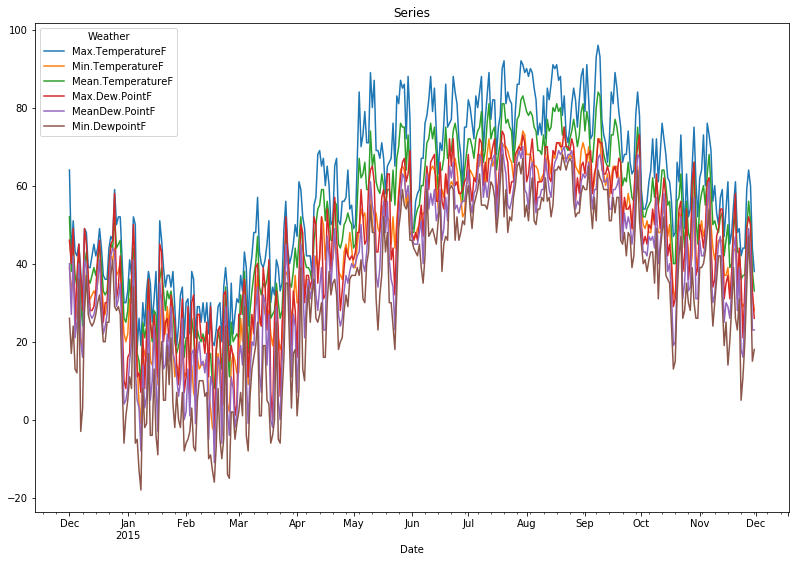

In [38]:
series = weather.plot(y = ['Max.TemperatureF','Min.TemperatureF','Mean.TemperatureF','Max.Dew.PointF','MeanDew.PointF','Min.DewpointF'],title= "Series")
series = series.get_figure()
series.set_size_inches(13.5,9)